In [3]:
import os
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt



In [4]:
emotion_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

In [26]:
import os
import librosa
import numpy as np
import pandas as pd

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfcc_mean = np.mean(mfccs, axis=1)
        mfcc_std = np.std(mfccs, axis=1)
        combined = np.hstack((mfcc_mean, mfcc_std))  # 80 features
        return combined
    except Exception as e:
        print(f"Error extracting from {file_path}: {e}")
        return None


In [27]:
def process_directory_with_emotion(folder_path):
    data = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                parts = file.split("-")
                emotion_code = parts[2]
                emotion = emotion_map.get(emotion_code)
                if emotion:
                    features = extract_features(file_path)
                    if features is not None:
                        data.append(np.append(features, emotion))
    return data

In [28]:
speech_path = "data/Audio_Speech_Actors_01-24"
song_path = "data/Audio_Song_Actors_01-24"

speech_data = process_directory_with_emotion(speech_path)
song_data = process_directory_with_emotion(song_path)


In [29]:
print("Sample row from speech data:", speech_data[0])
print("Length of speech row:", len(speech_data[0]))

print("Sample row from song data:", song_data[0])
print("Length of song row:", len(song_data[0]))


Sample row from speech data: ['-465.58524' '47.939762' '-4.321133' '18.968231' '-5.5401416' '3.1856914'
 '-7.47442' '-0.2168626' '-13.037419' '0.7006795' '-0.7688947'
 '-2.2492125' '-5.3587527' '3.8835547' '-11.278862' '6.615013'
 '-4.4750214' '2.0441964' '-1.1782671' '3.6508968' '-1.9553958'
 '2.3221054' '-1.1232377' '6.4526725' '0.13302204' '4.779666'
 '-0.09669819' '4.3812404' '2.027214' '5.5928044' '4.03682' '2.8155115'
 '1.84807' '7.283447' '6.228575' '4.727585' '3.7768767' '2.7578382'
 '3.3900623' '4.557003' '193.06654' '63.788475' '37.81695' '28.516443'
 '30.203783' '24.735548' '19.101322' '13.406024' '18.659864' '13.912894'
 '8.635478' '10.08788' '10.849148' '9.071151' '13.613104' '8.91056'
 '10.192906' '9.741436' '8.384284' '8.418414' '9.628868' '9.168459'
 '12.786472' '13.284946' '10.156' '10.932848' '10.224592' '10.515558'
 '7.8823314' '7.763833' '6.0954185' '6.93888' '8.23351' '8.088565'
 '7.277686' '5.202065' '5.8043823' '5.6683044' '5.2116265' '5.2338204'
 'disgust']
Leng

In [32]:
import pandas as pd

# Set column names
columns = [f"mfcc_{i}" for i in range(80)] + ["label"]

# Combine both datasets
all_data = speech_data + song_data

# Create DataFrame
df = pd.DataFrame(all_data, columns=columns)

print("Combined DataFrame shape:", df.shape)
df.head()



Combined DataFrame shape: (2452, 81)


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_71,mfcc_72,mfcc_73,mfcc_74,mfcc_75,mfcc_76,mfcc_77,mfcc_78,mfcc_79,label
0,-465.58524,47.939762,-4.321133,18.968231,-5.5401416,3.1856914,-7.47442,-0.2168626,-13.037419,0.7006795,...,6.93888,8.23351,8.088565,7.277686,5.202065,5.8043823,5.6683044,5.2116265,5.2338204,disgust
1,-706.1,70.54358,16.28219,29.985294,10.345717,16.573795,-5.463674,1.5304626,-11.65574,4.36757,...,4.6255126,6.438578,6.537913,8.975539,10.068616,8.567674,8.134824,6.398031,6.030593,calm
2,-590.00745,47.61272,5.170661,16.249762,-0.93754756,3.9266226,-6.4377313,-4.410734,-7.7625313,2.2426646,...,5.714684,4.742085,5.002414,4.0215154,3.543948,4.5985136,3.834902,4.725131,4.6571255,angry
3,-408.88144,35.199722,-24.511759,11.616077,-11.6350975,-5.995111,-10.618759,1.3625035,-15.447997,-0.55839235,...,7.127614,4.6733875,6.0116487,4.7632976,5.8374677,4.856857,3.781989,3.6865458,4.678629,angry
4,-706.7183,65.690025,8.897208,24.49816,4.893948,11.871783,-2.7110004,-3.9654596,-10.229705,3.5755074,...,4.841674,3.561566,3.5013824,3.9272535,4.023745,6.3270454,6.056579,5.043917,7.149975,neutral


In [33]:
# Convert all columns except 'label' to float
for col in df.columns[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

print("Cleaned DataFrame shape:", df.shape)
df.head()


Cleaned DataFrame shape: (2452, 81)


,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,...,mfcc_71,mfcc_72,mfcc_73,mfcc_74,mfcc_75,mfcc_76,mfcc_77,mfcc_78,mfcc_79,label
0,-465.58524,47.939762,-4.321133,18.968231,-5.540142,3.185691,-7.474420,-0.216863,-13.037419,0.700680,...,6.938880,8.233510,8.088565,7.277686,5.202065,5.804382,5.668304,5.211627,5.233820,disgust
1,-706.10000,70.543580,16.282190,29.985294,10.345717,16.573795,-5.463674,1.530463,-11.655740,4.367570,...,4.625513,6.438578,6.537913,8.975539,10.068616,8.567674,8.134824,6.398031,6.030593,calm
2,-590.00745,47.612720,5.170661,16.249762,-0.937548,3.926623,-6.437731,-4.410734,-7.762531,2.242665,...,5.714684,4.742085,5.002414,4.021515,3.543948,4.598514,3.834902,4.725131,4.657126,angry
3,-408.88144,35.199722,-24.511759,11.616077,-11.635098,-5.995111,-10.618759,1.362504,-15.447997,-0.558392,...,7.127614,4.673387,6.011649,4.763298,5.837468,4.856857,3.781989,3.686546,4.678629,angry
4,-706.71830,65.690025,8.897208,24.498160,4.893948,11.871783,-2.711000,-3.965460,-10.229705,3.575507,...,4.841674,3.561566,3.501382,3.927253,4.023745,6.327045,6.056579,5.043917,7.149975,neutral


/tmp/ipykernel_4409/3897569852.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='pastel')


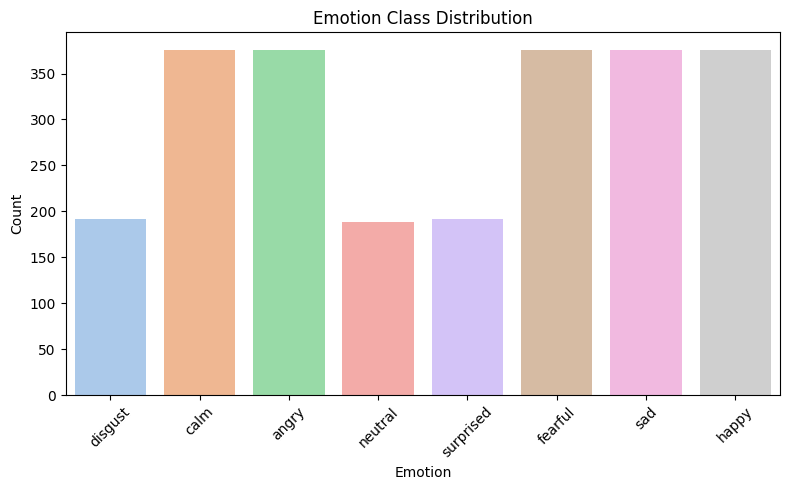

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='label', palette='pastel')
plt.title("Emotion Class Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


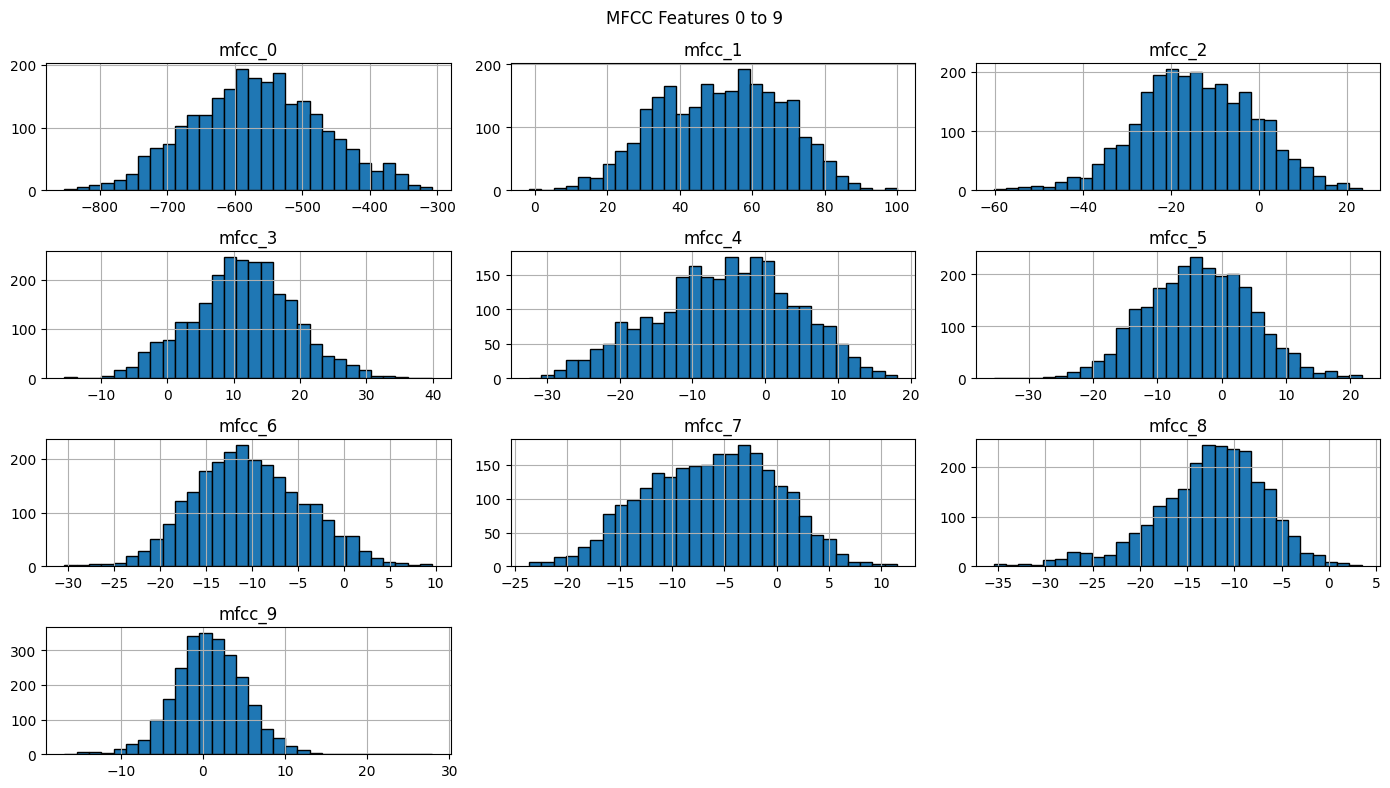

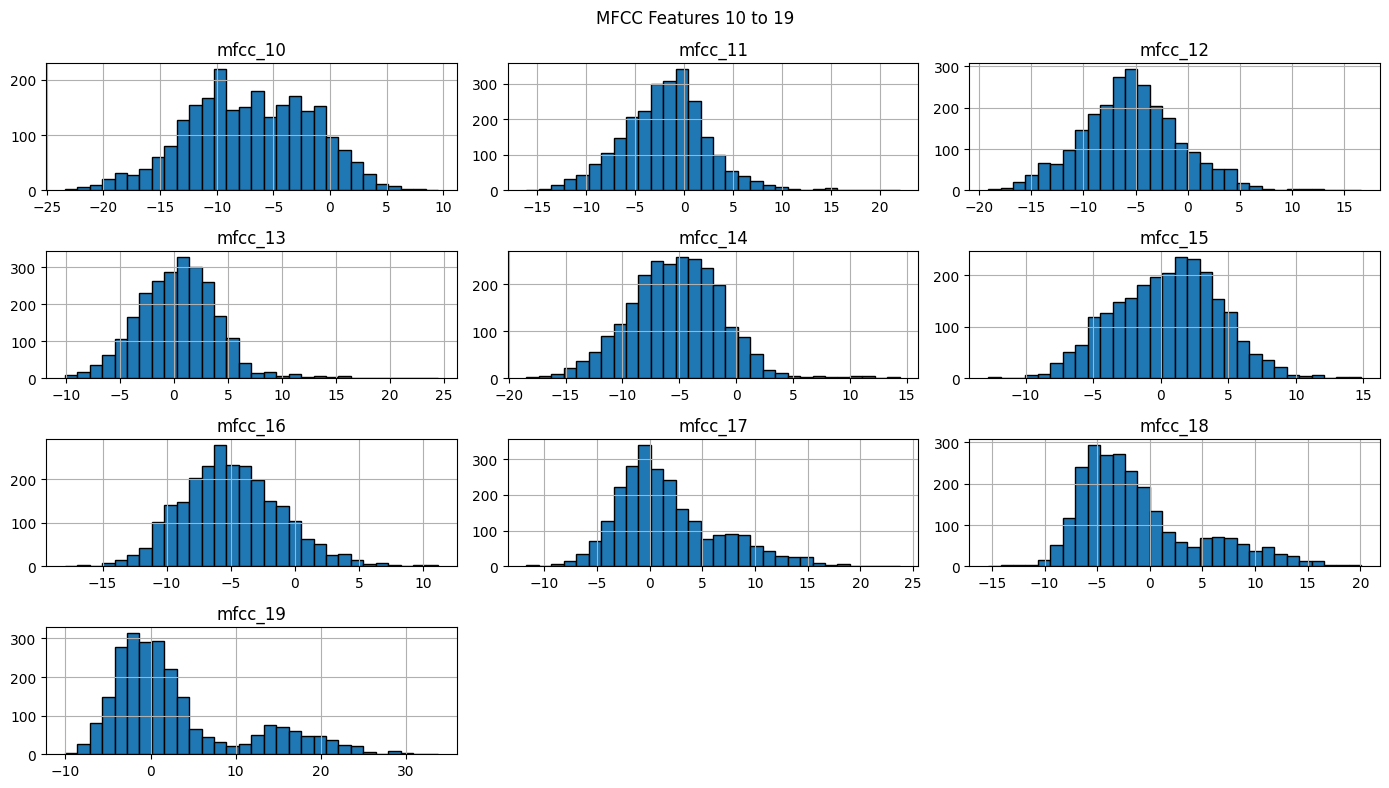

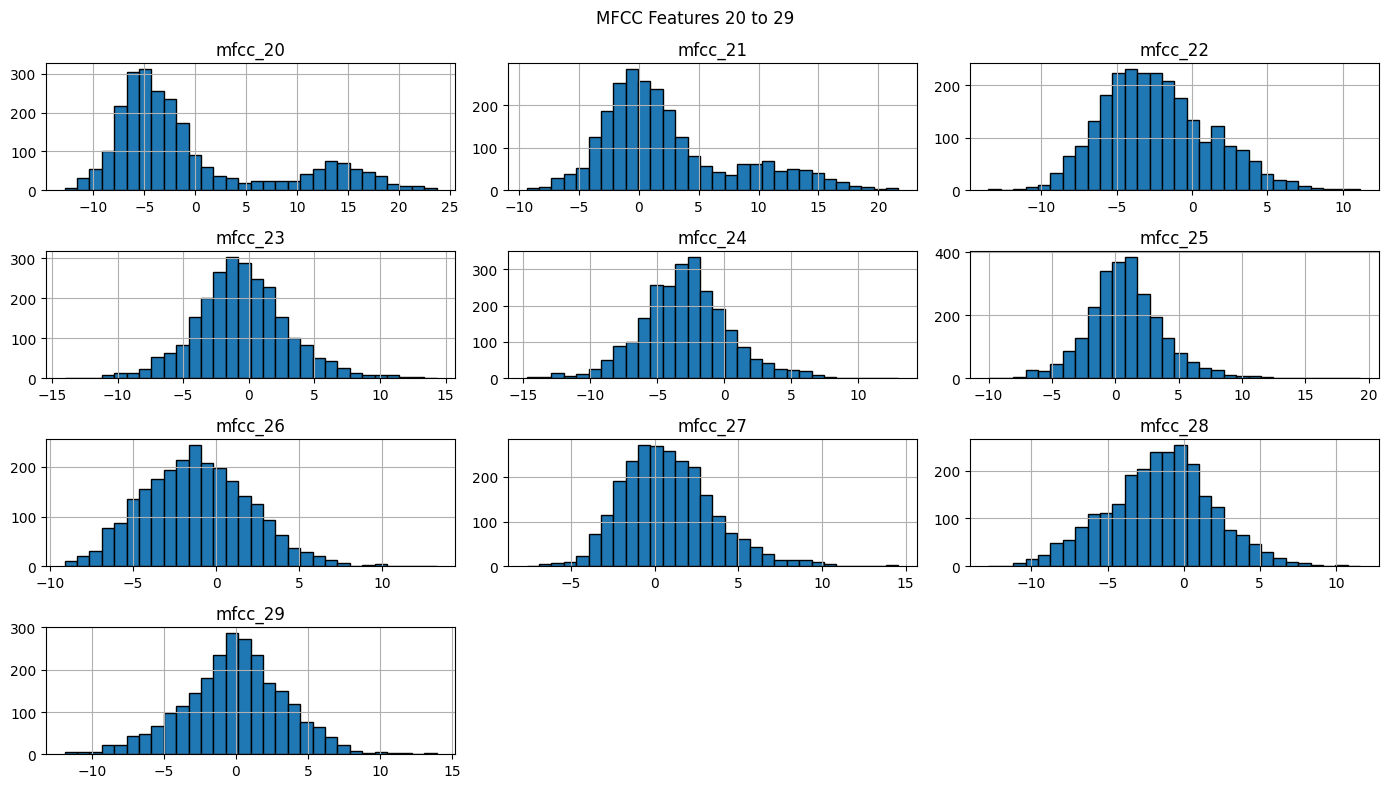

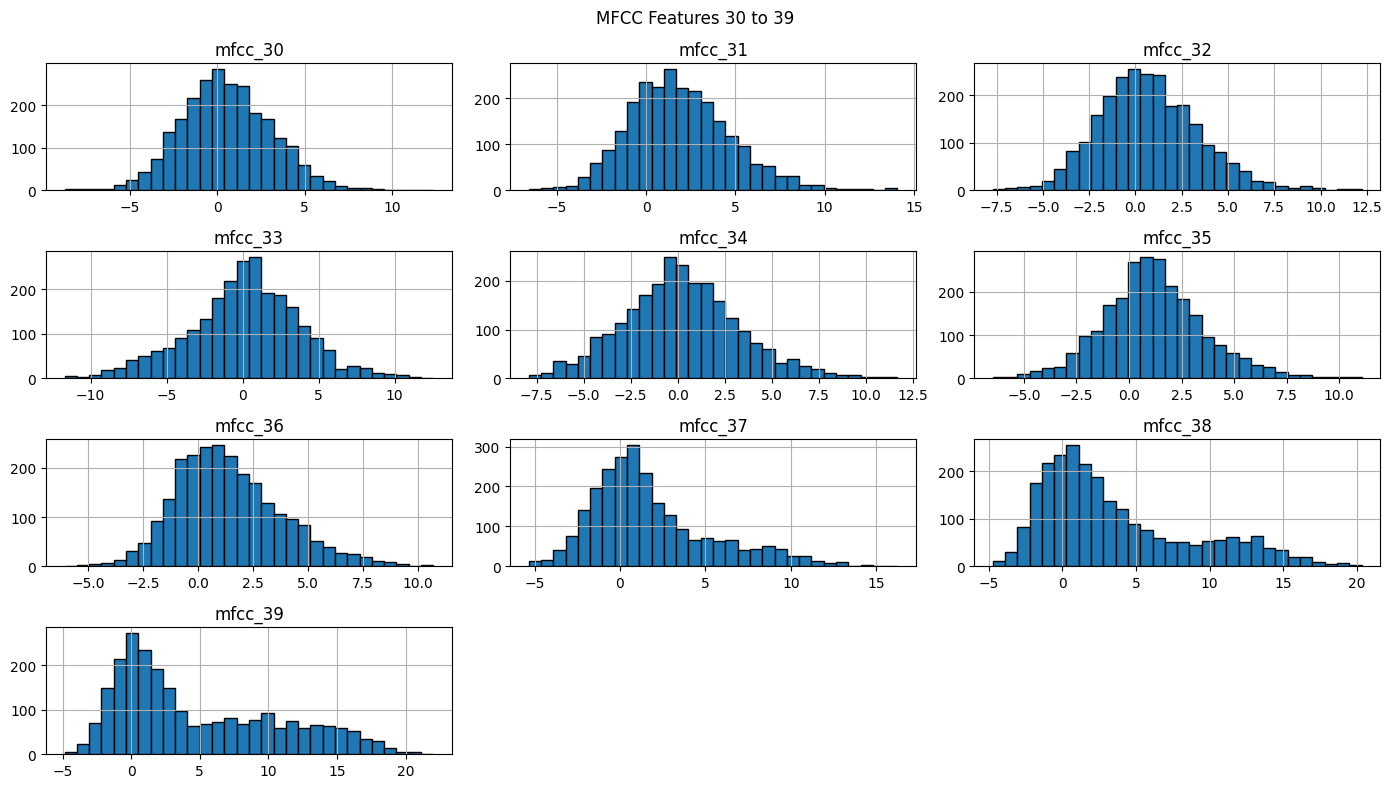

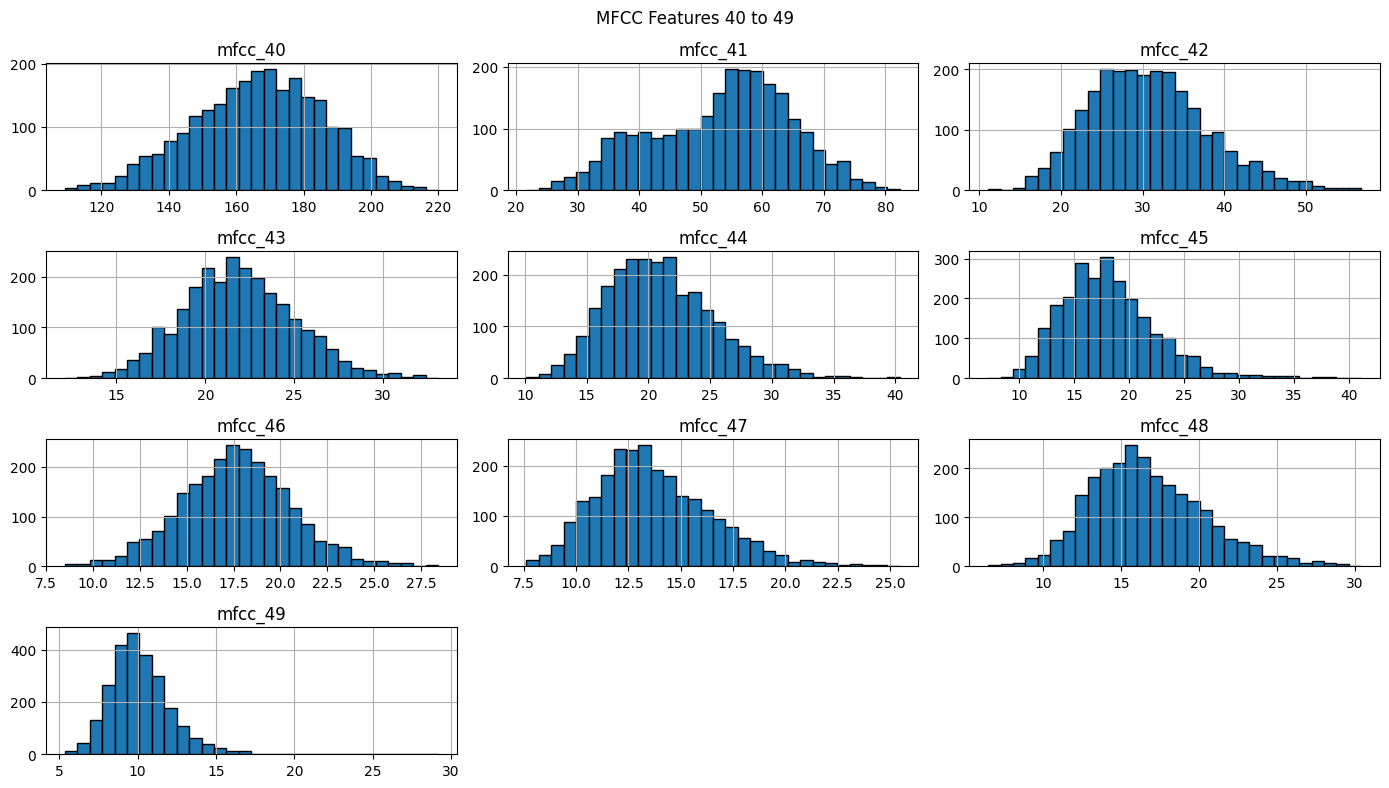

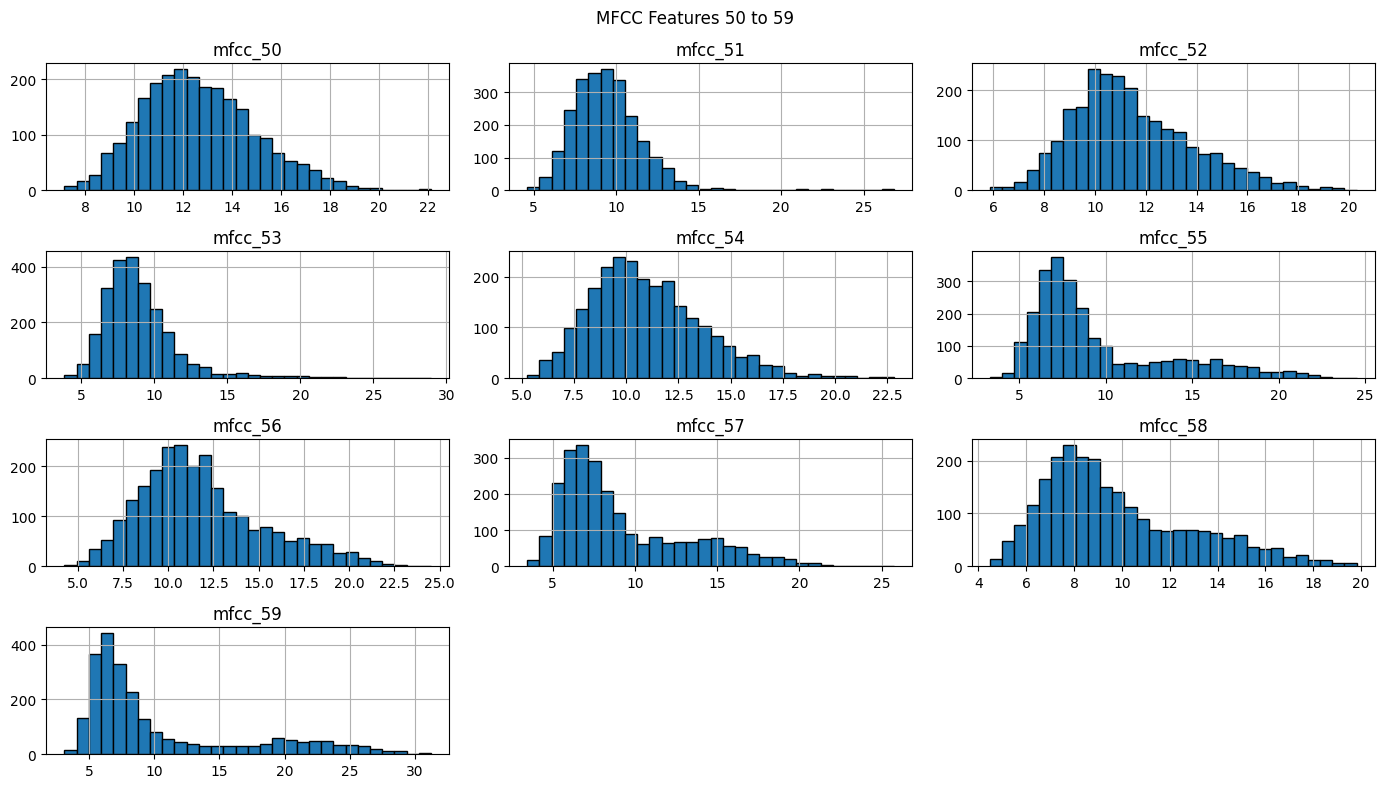

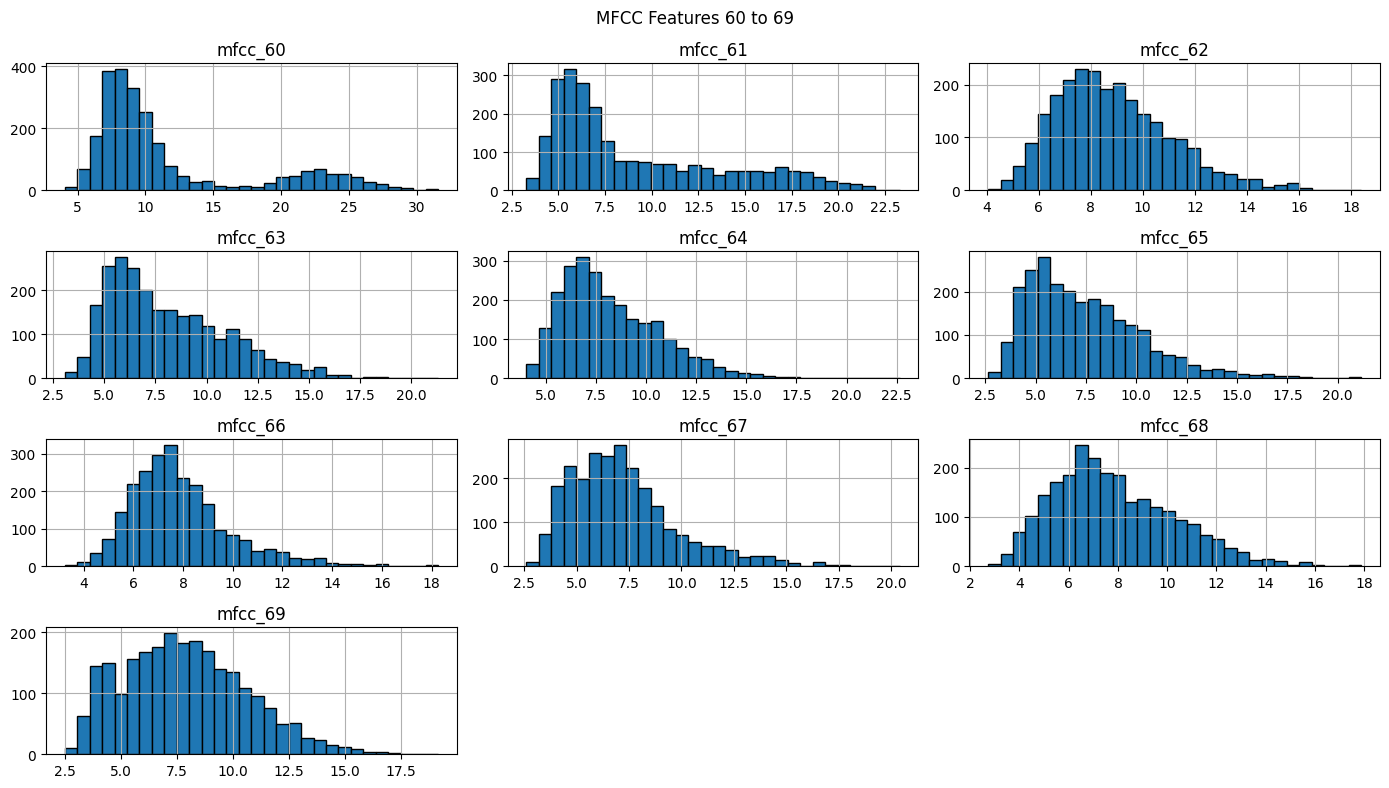

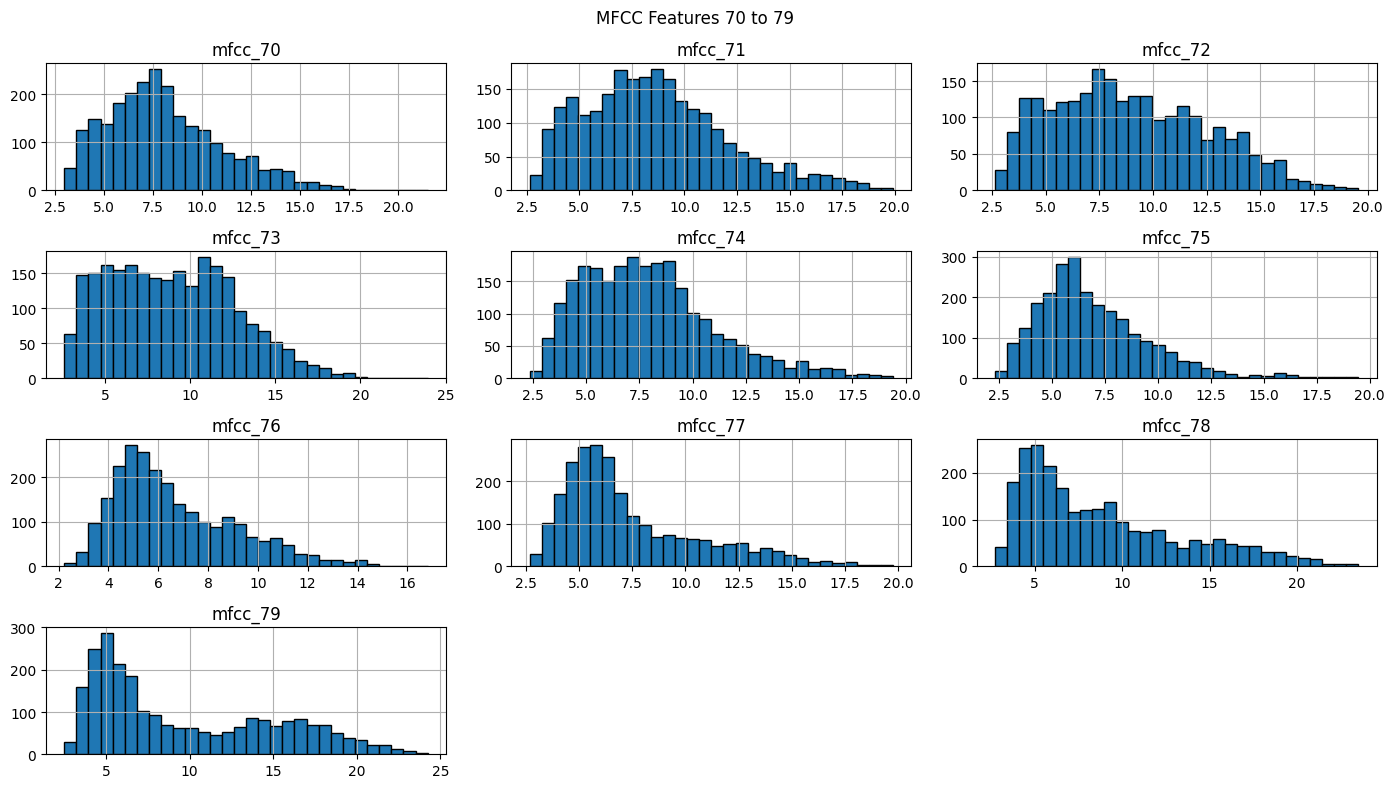

In [35]:
import numpy as np

cols = df.columns[:-1]  # Exclude 'label'
batch_size = 10

for i in range(0, len(cols), batch_size):
    batch_cols = cols[i:i+batch_size]
    df[batch_cols].hist(figsize=(14, 8), bins=30, edgecolor='black')
    plt.suptitle(f"MFCC Features {i} to {i + len(batch_cols) - 1}")
    plt.tight_layout()
    plt.show()


In [36]:
from sklearn.utils import resample

# Split by label
balanced_df = pd.DataFrame()
min_count = df['label'].value_counts().min()

for label in df['label'].unique():
    label_df = df[df['label'] == label]
    label_df_balanced = resample(label_df, replace=False, n_samples=min_count, random_state=42)
    balanced_df = pd.concat([balanced_df, label_df_balanced])

balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [37]:
# Save to CSV
df.to_csv("combined_emotion_data.csv", index=False)
print("DataFrame saved as 'combined_emotion_data.csv'")


DataFrame saved as 'combined_emotion_data.csv'


In [41]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])

X = df.drop(columns=['label', 'encoded_label'])
y = df['encoded_label']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [42]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label mapping:", label_mapping)


Label mapping: {np.str_('angry'): np.int64(0), np.str_('calm'): np.int64(1), np.str_('disgust'): np.int64(2), np.str_('fearful'): np.int64(3), np.str_('happy'): np.int64(4), np.str_('neutral'): np.int64(5), np.str_('sad'): np.int64(6), np.str_('surprised'): np.int64(7)}


In [43]:
# Features = all MFCCs
X = df.drop(columns=['label', 'encoded_label'])
y = df['encoded_label']

print("Feature matrix X shape:", X.shape)
print("Target vector y shape:", y.shape)


Feature matrix X shape: (2452, 80)
Target vector y shape: (2452,)


In [44]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1961, 80)
X_test shape: (491, 80)
y_train shape: (1961,)
y_test shape: (491,)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')

# Output results
print("Cross-validation scores:", cv_scores)
print("Average cross-validation accuracy:", np.mean(cv_scores))


Cross-validation scores: [0.70483461 0.72959184 0.69642857 0.71428571 0.69897959]
Average cross-validation accuracy: 0.7088240639767358


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=300, max_depth=30, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7474541751527495
              precision    recall  f1-score   support

           0       0.77      0.83      0.79        75
           1       0.71      0.96      0.82        75
           2       0.80      0.62      0.70        39
           3       0.69      0.65      0.67        75
           4       0.82      0.68      0.74        75
           5       1.00      0.68      0.81        38
           6       0.72      0.75      0.73        75
           7       0.64      0.69      0.67        39

    accuracy                           0.75       491
   macro avg       0.77      0.73      0.74       491
weighted avg       0.76      0.75      0.75       491



In [47]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.5091649694501018
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        75
           1       0.50      0.89      0.64        75
           2       0.40      0.26      0.31        39
           3       0.45      0.45      0.45        75
           4       0.63      0.49      0.55        75
           5       1.00      0.03      0.05        38
           6       0.41      0.40      0.40        75
           7       0.36      0.41      0.38        39

    accuracy                           0.51       491
   macro avg       0.56      0.46      0.44       491
weighted avg       0.55      0.51      0.48       491



In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy'
)

# Fit on training data
grid_search.fit(X_train, y_train)

# Best Parameters and Accuracy
print("Best Params:", grid_search.best_params_)
print(" Best CV Accuracy:", grid_search.best_score_)

# Train final model with best parameters
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_rf.predict(X_test)
print("🧪 Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s


In [49]:
from sklearn.ensemble import RandomForestClassifier

# Train model with best parameters
best_rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_leaf=1,
    min_samples_split=2,
    bootstrap=False,
    random_state=42
)

best_rf.fit(X_train, y_train)
print(" Final model training complete.")


 Final model training complete.


 Test Accuracy: 0.7658

 Classification Report:
              precision    recall  f1-score   support

       angry       0.80      0.84      0.82        75
        calm       0.76      0.95      0.84        75
     disgust       0.74      0.64      0.68        39
     fearful       0.76      0.69      0.73        75
       happy       0.79      0.75      0.77        75
     neutral       0.93      0.74      0.82        38
         sad       0.76      0.73      0.75        75
   surprised       0.60      0.67      0.63        39

    accuracy                           0.77       491
   macro avg       0.77      0.75      0.76       491
weighted avg       0.77      0.77      0.76       491



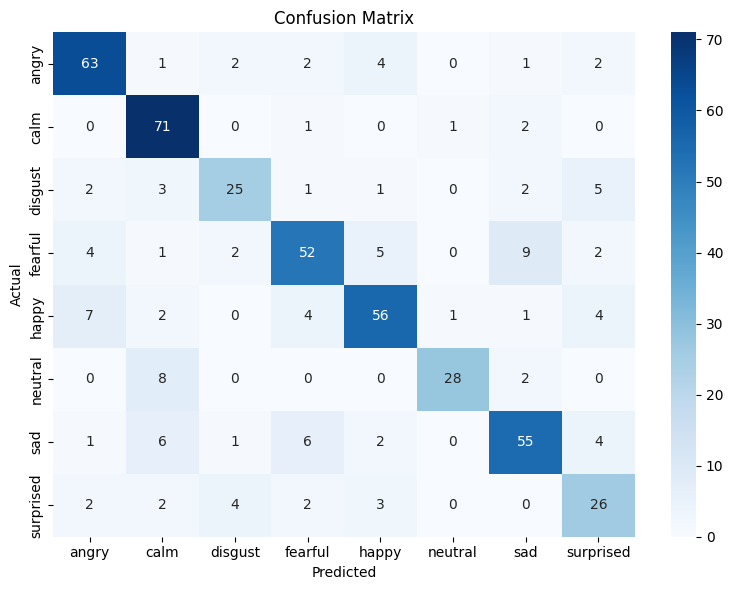

In [50]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = best_rf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f" Test Accuracy: {accuracy:.4f}")

# Classification report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


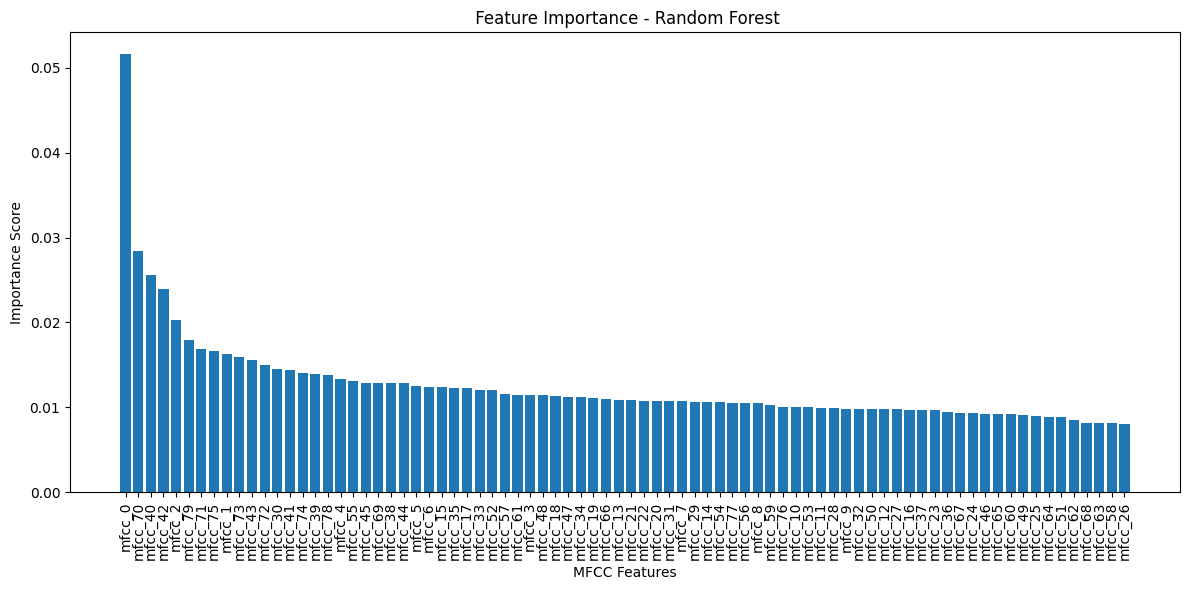

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names: mfcc_0 to mfcc_39
feature_names = [f'mfcc_{i}' for i in range(80)]

# Get feature importances from the model
importances = best_rf.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(12, 6))
plt.title(" Feature Importance - Random Forest")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("MFCC Features")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [52]:
import joblib


joblib.dump(best_rf, "emotion_classifier_model.pkl")
print("Model saved as 'emotion_classifier_model.pkl'")


Model saved as 'emotion_classifier_model.pkl'


In [53]:
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']